# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
    'savefig.directory':'./Images'
})

#parametri per il calcolo
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

#### Soluzione
Il campionamento di Gibbs è un ulteriore metodo per capionare una distribuzione di probabilità e può essere visto come un caso particolare dell'algoritmo di Metropolis in cui la mossa proposta è sempre accettata. Il processo può essere visto come una realizzazione di una catena di Markov costruita a partire da un set di probabilità di transizione $T_k$: 
$$T_k(\vec{x} | \vec{y}) = p_{|\ln -1}(x_k | \{ y_i : i \ne k \}) \cdot \prod_{i (\ne k)} \delta(x_i - y_i)$$
dove ciascuna $T_k$ modifica una $y_k$ e lascia tutte le altre invariate.

Quando viene visitato un certo spin del sistema gli viene assegnato un nuovo valore in base alla probabilità:

$$ p(s_k' = \pm 1 \mid \{s_j : j \ne k\}) = 
\frac{1}{1 + \exp\left(-\beta \Delta E_{s_k = \mp 1 \rightarrow s_k = \pm 1}\right)} 
= \frac{1}{1 + \exp\left(\mp 2 \beta J \sum_{i \ (\text{n.n. to } k)} s_i\right)}$$

indipendentemente dal suo valore nel momento in cui viene selezionato.

Nella struttura del nostro simulatore il metodo di Gibbs corrisponde a ``` _sim_type = 3 ```. Ho implementato la mossa del campionamento come segue (in ``` move()``` ):

``` c++
if(_sim_type == 3){
    double delta_E = 2.0 * ( _J * (_particle(this->pbc(i-1)).getspin() + _particle(this->pbc(i+1)).getspin() ) + _H );
    double p = 1./(1.+exp(- _beta * delta_E));
    if(_rnd.Rannyu() < p) {
      _particle(i).setspin(+1);
    } else {
      _particle(i).setspin(-1);
      _naccepted++;
    }
} 
```


Ho implemetato il calcolo di alcune proprietà del sistema i cui valori medi vengono poi calcolati campionando la probabilità di transizione sia con Metropolis che con Gibbs e calcolando la blocking average. Ogni proprietà viene calcolata a diversi valori della temperatura per poi confrontarla con le curve teoriche del modello di Ising 1D.

Di seguito riportiamo il metodo di implementazione e i risultati per le proprietà studiate: _energia interna, suscettibilità, calore specifico_ e _magnetizzazione_.

1. l'**energia interna** è già implementata e si ottengono i seguenti risultati:

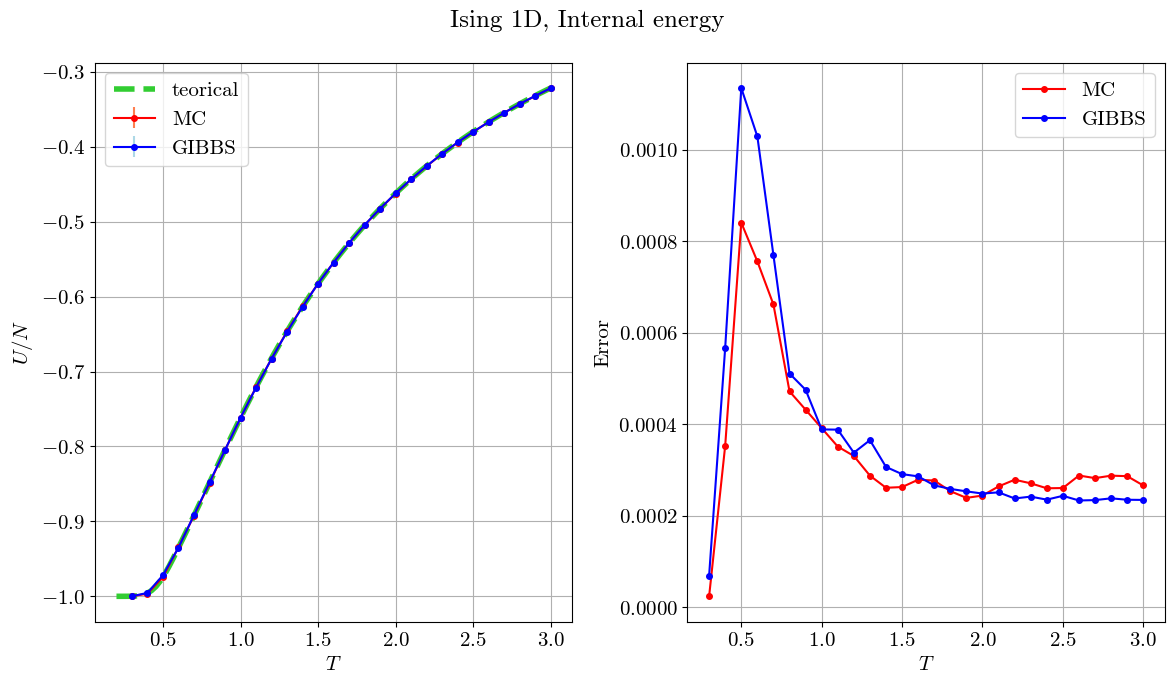

In [3]:
e = -J*( th + ch*thN )/( 1 + thN )

e1 = np.loadtxt("NSL_SIMULATOR/OUTPUT/ENERGY/MC/total_energy_summary.dat")
x1 = e1[:,0]
y1 = e1[:,2]
err1 = e1[:,3]
e2 = np.loadtxt("NSL_SIMULATOR/OUTPUT/ENERGY/GIBBS/total_energy_summary.dat")
x2 = e2[:,0]
y2 = e2[:,2]
err2 = e2[:,3]

fig = plt.figure(1, figsize =(12,7))
fig.suptitle('Ising 1D, Internal energy')

plt.subplot(1,2,1)
plt.plot(T, e, color = 'limegreen', linewidth = 4, linestyle= '--', label = 'teorical')
plt.errorbar(x1,y1,err1, ecolor= 'coral' ,color='red', marker = 'o', markersize = 4, label = 'MC')
plt.errorbar(x2,y2,err2, ecolor= 'lightblue' ,color='blue', marker = 'o', markersize = 4, label = 'GIBBS')
plt.xlabel('$T$')
plt.ylabel('$U/N$')
plt.legend()
plt.grid(True)


plt.figure(1)
plt.subplot(1,2,2)
plt.plot(x1,err1, color='red', marker = 'o', markersize = 4, label = 'MC')
plt.plot(x2,err2, color='blue', marker = 'o', markersize = 4, label = 'GIBBS')
plt.xlabel('$T$')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- la **suscettibilità** è il valor medio del quadrato della somma degli spin moltipicato per $\beta$. Ho impementato come segue (in ``` measure() ```):
``` c++
  if (_measure_chi) {
    double chi = pow(spinsum, 2);
    _measurement(_index_chi) = _beta * chi/double(_npart);
  }
```
e poi ho eseguito la media a blocchi in ``` averages() ```.

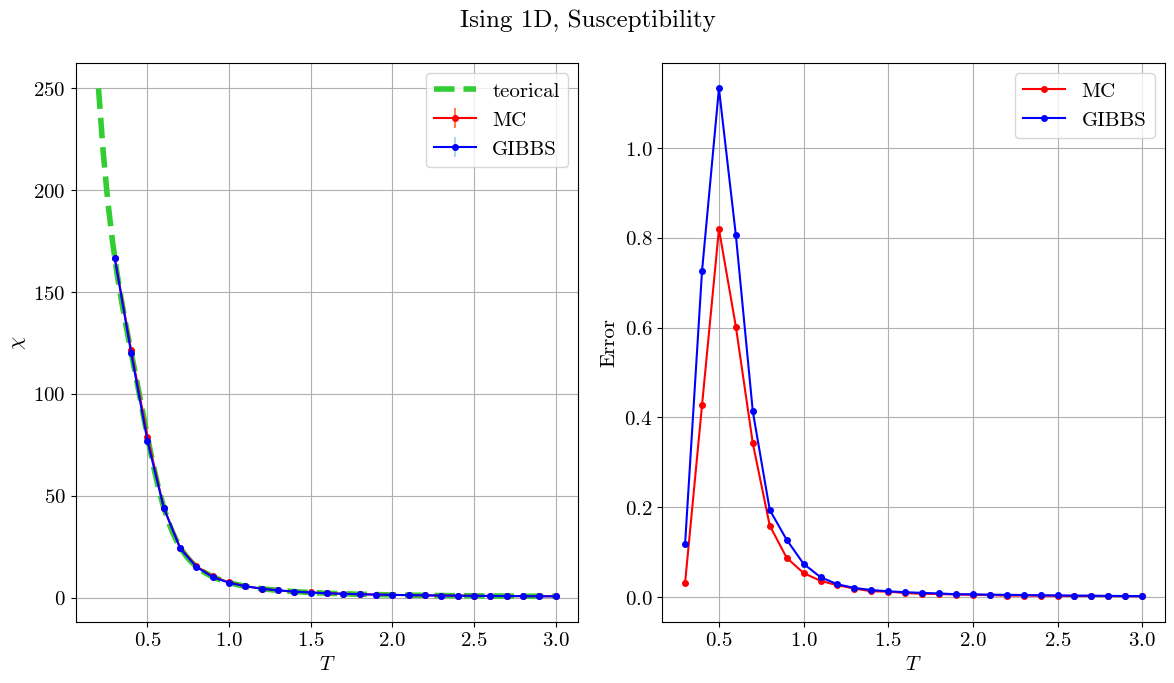

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

X_1 = np.loadtxt("NSL_SIMULATOR/OUTPUT/SUSCEPTIBILITY/MC/susceptibility_summary.dat")
x1 = X_1[:,0]
y1= X_1[:,2]
err1 = X_1[:,3]

X_2 = np.loadtxt("NSL_SIMULATOR/OUTPUT/SUSCEPTIBILITY/GIBBS/susceptibility_summary.dat")
x2 = X_2[:,0]
y2= X_2[:,2]
err2 = X_2[:,3]

fig = plt.figure(1, figsize =(12,7))
fig.suptitle('Ising 1D, Susceptibility')

plt.subplot(1,2,1)
plt.plot(T, X, color = 'limegreen', linewidth = 4, linestyle= '--', label = 'teorical')
plt.errorbar(x1,y1,err1, ecolor= 'coral' ,color='red', marker = 'o', markersize = 4, label = 'MC')
plt.errorbar(x2,y2,err2, ecolor= 'lightblue' ,color='blue', marker = 'o', markersize = 4, label = 'GIBBS')
plt.xlabel('$T$')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)


plt.figure(1)
plt.subplot(1,2,2)
plt.plot(x1,err1, color='red', marker = 'o', markersize = 4, label = 'MC')
plt.plot(x2,err2, color='blue', marker = 'o', markersize = 4, label = 'GIBBS')
plt.xlabel('$T$')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




- il **calore specifico** è $k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)$, quindi per calcolarlo mi serve calcolare anche l'energia media. Per implementarla calcolo $H^2$ in ``` measure() ``` e in ``` averages() ``` completo il calcolo con $\langle H \rangle^2$, dove $\langle H \rangle$ è stato valutato separatamente; infine moltiplico per $\beta^2$. Per confrontare i risultati della simulazione con la curva teorica devo moltiplicare i valori ottenuti per il numero di partice ($N=50$).

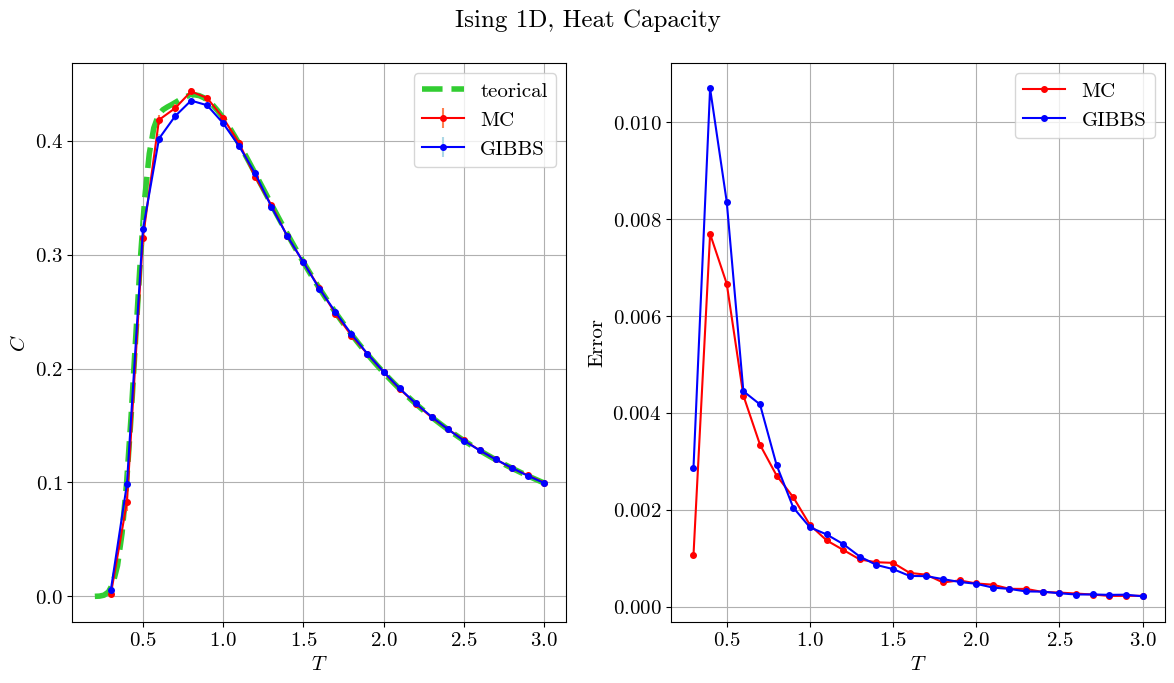

In [5]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

# valori delle simulazioni
heat1 = np.loadtxt("NSL_SIMULATOR/OUTPUT/HEAT_CAPACITY/MC/specific_heat_summary.dat")
x1 = heat1[:,0]
y1 = heat1[:,2]*50
err1 = heat1[:,3]*50
heat2 = np.loadtxt("NSL_SIMULATOR/OUTPUT/HEAT_CAPACITY/GIBBS/specific_heat_summary.dat")
x2 = heat2[:,0]
y2 = heat2[:,2]*50 
err2 = heat2[:,3]*50

fig = plt.figure(1, figsize =(12,7))
fig.suptitle('Ising 1D, Heat Capacity')

plt.subplot(1,2,1)
plt.plot(T, heat, color = 'limegreen', linewidth = 4, linestyle= '--', label = 'teorical')
plt.errorbar(x1,y1,err1, ecolor= 'coral' ,color='red', marker = 'o', markersize = 4, label = 'MC')
plt.errorbar(x2,y2,err2, ecolor= 'lightblue' ,color='blue', marker = 'o', markersize = 4, label = 'GIBBS')
plt.xlabel('$T$')
plt.ylabel('$C$')
plt.legend()
plt.grid(True)

plt.figure(1)
plt.subplot(1,2,2)
plt.plot(x1,err1, color='red', marker = 'o', markersize = 4, label = 'MC')
plt.plot(x2,err2, color='blue', marker = 'o', markersize = 4, label = 'GIBBS')
plt.xlabel('$T$')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



- la **magnetizzazione** viene calcolata con un campo esterno $h$ non nullo ($h = 0.02$) ed è = $\left\langle \sum_{i=1,N}s_i \right\rangle $. Per implementare questo calcolo aggiungo in ``` measure() ```: 
  ``` c++
  if (_measure_magnet){
    _measurement(_index_magnet) = spinsum/double(_npart);
  }
  ```
e eseguo la media a blocchi in ``` averages() ```.

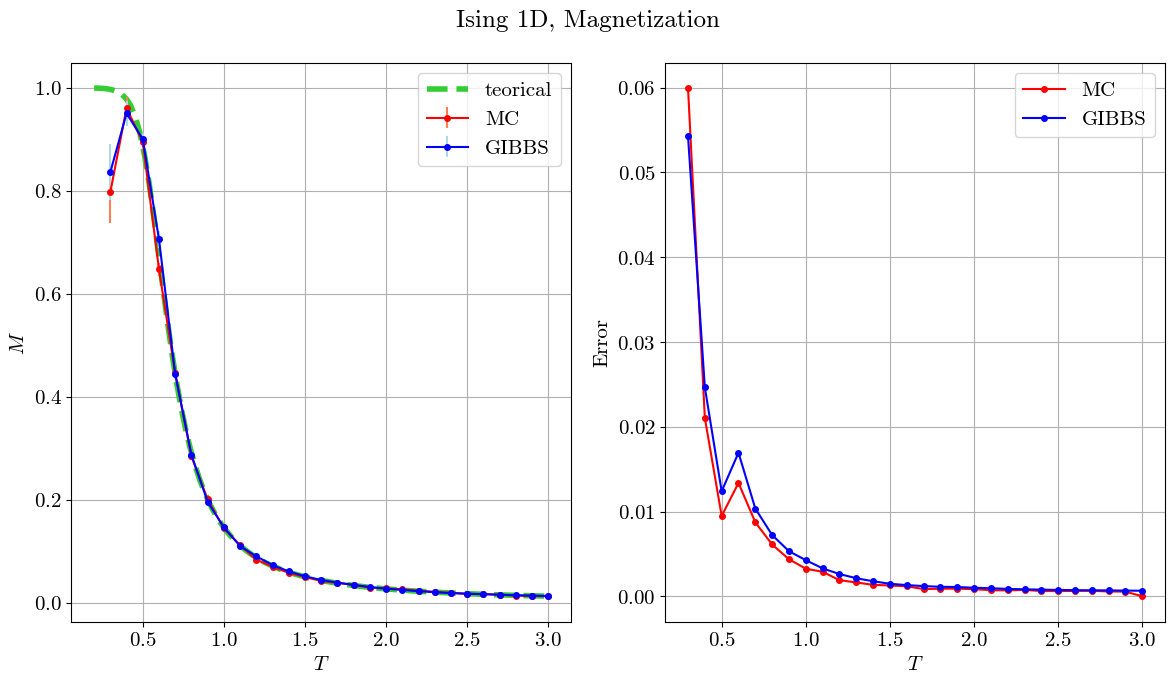

In [6]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

# valori delle simulazioni
magn1 = np.loadtxt("NSL_SIMULATOR/OUTPUT/MAGNETIZATION/MC/magnetization_summary.dat")
x1 = magn1[:,0]
y1 = magn1[:,2]
err1 = magn1[:,3]
magn2 = np.loadtxt("NSL_SIMULATOR/OUTPUT/MAGNETIZATION/GIBBS/magnetization_summary.dat")
x2 = magn2[:,0]
y2 = magn2[:,2]
err2 = magn2[:,3]

fig = plt.figure(1, figsize =(12,7))
fig.suptitle('Ising 1D, Magnetization')

plt.subplot(1,2,1)
plt.plot(T, M, color = 'limegreen', linewidth = 4, linestyle= '--', label = 'teorical')
plt.errorbar(x1,y1,err1, ecolor= 'coral' ,color='red', marker = 'o', markersize = 4, label = 'MC')
plt.errorbar(x2,y2,err2, ecolor= 'lightblue' ,color='blue', marker = 'o', markersize = 4, label = 'GIBBS')
plt.xlabel('$T$')
plt.ylabel('$M$')
plt.legend()
plt.grid(True)

plt.figure(1)
plt.subplot(1,2,2)
plt.plot(x1,err1, color='red', marker = 'o', markersize = 4, label = 'MC')
plt.plot(x2,err2, color='blue', marker = 'o', markersize = 4, label = 'GIBBS')
plt.xlabel('$T$')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ciascuna simulazione è stata eseguita con $10^2$ blocchi da $4*10^3$ passi.

Prima di iniziare tutte le simulazioni è stata fatta un'__equilibrazione__ del sistema. Questa fase preliminare consiste nel fissare una temperatura $T=0.3$, eseguire il codice e salvare la configurazione finale raggiunta come configurazione da cui partire per la simulazione successiva.
Questo spiega perchè in alcuni casi (soprattutto nella magnetizzazione) i risultati ottenuti per T = 0.3 non sono in accordo con la curva teorica, infatti quelli con T=0.3 sono i rsultati ottenuti senza aver fatto ancora la simulazione e il fatto che in alcuni casi non siano in accordo con il modello teorico è una conferma del fatto che l'equilibrazione è necessaria.

Successivamente tutte le altre simulazioni sono state eseguite settando il ```RESTART``` = 1, che significa che il codice andrà a leggere come configurazione iniziale l'ultima configurazione che è stata raggiunta dalla simulazione precedente.

Per automatizzare il processo di creazione dei grafici ho scritto uno _script di bash_ che ad ogni simulazione modifica la temperatura incrementandola di $0.1$, salva il valore finale raggiunto per ogni proprietà analizzata e salva la configurazione finale come file di input per la simulazione successiva.